# Knapsack problem optimization

Problem: You are given a set of items, each with a weight and a value, and a knapsack with a maximum weight capacity. The goal is to determine the combination of items to include in the knapsack to maximize the total value without exceeding the weight capacity. Use simulated annealing, genetic algorithm, or other optimization method to find an approximate solution.

Example:
Imagine you have 4 items with weights 4, 3, 9, and 11kg respectively. These same items have a value of 33, 24, 100, and 93 units respectively. We can represent the `weights` and `values` with two arrays
```
weights = [4, 3, 9, 11]
values = [33, 24, 100, 93]

```
We can add items 0 and 3 to the knapsack. `knapsack = [0, 3]`. The weight of the knapsack is then `knapsack_weight = weights[0] + weigths[3] = 15` and the total value of the knapsack is `knapsack_value = values[0] + values[3] = 126`.

In this notebook we will randomly generate a problem. The seed is fixed so the problem is the same for multiple notebook runs.

In [1]:
import random
num_items = 1000
max_value = 100
max_weight = 50
random.seed(1333)
values = [random.randint(1, max_value) for _ in range(num_items)]
weights = [random.randint(1, max_weight) for _ in range(num_items)]

In [2]:
# Let's print the values
print(values)

[63, 46, 81, 11, 32, 95, 61, 85, 34, 86, 70, 10, 68, 71, 18, 52, 49, 95, 27, 37, 43, 98, 57, 70, 50, 1, 10, 51, 86, 56, 73, 59, 10, 98, 15, 28, 2, 56, 65, 54, 4, 47, 11, 71, 87, 24, 33, 47, 36, 69, 94, 37, 93, 48, 94, 2, 43, 85, 59, 53, 26, 74, 31, 29, 47, 30, 23, 26, 86, 65, 30, 57, 10, 34, 27, 78, 7, 44, 61, 94, 75, 92, 9, 34, 41, 90, 33, 45, 95, 33, 13, 13, 54, 35, 5, 86, 49, 8, 32, 88, 36, 46, 11, 62, 49, 54, 5, 24, 57, 71, 81, 3, 11, 61, 23, 13, 93, 96, 51, 63, 82, 59, 57, 38, 27, 3, 8, 77, 92, 38, 14, 27, 82, 30, 52, 36, 77, 27, 57, 61, 53, 54, 100, 75, 18, 35, 58, 58, 7, 72, 17, 61, 45, 23, 29, 7, 18, 92, 39, 83, 34, 13, 73, 43, 42, 34, 52, 31, 86, 29, 7, 31, 16, 48, 2, 63, 6, 66, 100, 45, 24, 19, 45, 41, 90, 64, 100, 88, 92, 92, 94, 50, 91, 7, 11, 90, 66, 33, 44, 46, 47, 89, 42, 35, 86, 62, 74, 59, 94, 11, 85, 7, 31, 11, 96, 34, 67, 84, 29, 7, 56, 6, 5, 48, 11, 21, 85, 57, 28, 69, 70, 64, 12, 6, 97, 60, 39, 50, 92, 79, 62, 72, 74, 85, 30, 9, 16, 13, 31, 26, 64, 75, 90, 39, 19, 

In [3]:
# Let's print the weights
print(weights)

[26, 12, 11, 17, 37, 7, 42, 22, 37, 44, 4, 16, 40, 46, 27, 15, 26, 6, 10, 15, 37, 31, 45, 2, 12, 47, 32, 41, 45, 17, 47, 40, 32, 12, 32, 10, 9, 18, 34, 47, 21, 47, 50, 44, 6, 38, 45, 32, 46, 15, 35, 9, 44, 22, 19, 27, 13, 28, 39, 8, 29, 12, 36, 36, 41, 11, 16, 21, 32, 26, 12, 21, 23, 17, 18, 23, 27, 20, 24, 47, 40, 9, 3, 34, 2, 49, 1, 10, 8, 46, 10, 11, 32, 41, 14, 2, 32, 13, 50, 17, 7, 45, 10, 21, 12, 5, 23, 41, 6, 29, 32, 16, 6, 2, 38, 28, 15, 5, 28, 5, 35, 25, 48, 38, 37, 5, 12, 21, 1, 13, 29, 14, 22, 31, 38, 49, 47, 33, 32, 18, 11, 15, 20, 3, 10, 40, 3, 42, 10, 42, 48, 9, 18, 48, 33, 28, 23, 13, 11, 45, 33, 24, 43, 9, 38, 45, 48, 41, 42, 15, 50, 18, 35, 18, 4, 37, 24, 35, 22, 26, 15, 32, 25, 44, 7, 10, 1, 2, 14, 15, 19, 47, 40, 32, 18, 37, 32, 43, 25, 39, 20, 13, 39, 7, 29, 7, 26, 48, 11, 18, 26, 46, 44, 13, 47, 21, 33, 23, 50, 20, 19, 6, 27, 34, 48, 19, 47, 34, 1, 20, 25, 18, 30, 14, 47, 17, 50, 38, 29, 22, 28, 15, 24, 12, 8, 29, 33, 25, 47, 39, 21, 50, 46, 42, 36, 50, 46, 23, 4, 

Max knapsack capacity
(this is the value the knapsack should not exceed for the solution to be accepted)

In [4]:
max_knapsack_capacity = 500

The solution should look like:

```
Maximum value: [some_value]
Number of items selected: [number_of_items]
Selected items: [list_of_selected_item_indices]
```

### Maximum Value:

This is the maximum total value of the items that can be included in the knapsack while staying within the capacity limit.
Example: If the output is Maximum value: 4523, it means the best solution found by the algorithm yields a total value of 4523 units.

### Number of Items Selected:

This is the count of items that were chosen to be included in the knapsack to achieve the maximum value.
Example: If the output is Number of items selected: 150, it means that among the 1000 items, 150 items were included in the knapsack.

### Selected Items:

This is a list of indices (or item IDs) of the items that are included in the knapsack.
Example: If the output is Selected items: `[1, 4, 8, 23, ...]`, it means the items at these indices (e.g., item 1, item 4, item 8, item 23, etc.) were selected as part of the optimal solution.



## Implement the solution representation

Not entirely sure what is meant here but the data structure of my solution is a binary array of length num_items indicating which items are selected to be included in the knapsack. This is handled in the creation of the starting solution below as well as in the algorithm itself.

In [5]:
def print_solution(selected_items_binary, values, weights):
  total_value = sum(v for v, s in zip(values, selected_items_binary) if s == 1)
  num_items_selected = sum(selected_items_binary) # sum all 1 indices
  selected_items = [index for index, item in enumerate(selected_items_binary) if item==1]
  print(f"Maximum value: {total_value}")
  print(f"Number of items selected: {num_items_selected}")
  print(f"Selected items: {selected_items}")

## Implement the algorithm
make sure to comment on the code

In [36]:
import math

max_iter = 100

def knapsack_simulated_annealing(starting_solution, values, weights, max_capacity, max_iterations, max_temp, alpha):
  best_weights = list()
  best_values = list()

  current_solution = starting_solution
  best_solution = current_solution
  current_temp = max_temp

  for i in range(max_iterations):
    neighbor_solution = CreateNeighborSolution(current_solution)
    current_temp = current_temp * alpha
    total_value_current , _ = calculate_cost(current_solution, values, weights, max_capacity)
    total_value_new , is_below_capacity = calculate_cost(neighbor_solution, values, weights, max_capacity)
    total_value_best, _ = calculate_cost(best_solution, values, weights, max_capacity)
    #print(total_value_best)

    if is_below_capacity and total_value_new >= total_value_current:
      current_solution = neighbor_solution
      if total_value_new >= total_value_best:
        best_solution = neighbor_solution
    else:
      try:
        acceptance_probability =math.exp((total_value_current-total_value_new)/current_temp)
      except OverflowError:
        acceptance_probability = 0
      if random.random() < acceptance_probability:
        current_solution = neighbor_solution

      # get weight and value of best solution in this iteration
    total_value_best, _ = calculate_cost(best_solution, values, weights, max_capacity)
    total_weight_best = sum(w for w, s in zip(weights, best_solution) if s == 1)

    best_values.append(total_value_best)
    best_weights.append(total_weight_best)

  return best_solution, best_values, best_weights


def CreateNeighborSolution(current_solution): # simply switch random index
  neighbor_solution = current_solution.copy() # make sure we do not change current solution
  num_items = len(current_solution)
  index = random.randint(0, num_items-1) # get random index to flip

  if neighbor_solution[index] == 1: # flip to 0 if value=1
    neighbor_solution[index] = 0
  else:
    neighbor_solution[index] = 1  # flip to 1 if value=0

  return neighbor_solution


def calculate_cost(current_solution, values, weights, max_capacity): # cost is simply value while being below max capacity. We want to maximize value while staying below max capacity.
  total_value = sum(v for v, s in zip(values, current_solution) if s == 1)
  total_weight = sum(w for w, s in zip(weights, current_solution) if s == 1)
  is_below_capacity = True if total_weight < max_capacity else False
  #print(total_weight)
  return (total_value, is_below_capacity)

## Initialise the starting solution

The approach below starts with a 0 array and iteratively sets random indices to 1 until max_capacity is reached to produce a starting solution for the optimization. It might be faster and better to just sort the the items by value/weight ratio and fill the array with these indices to make sure the items are also valuable, while my approach does not consider the value. Technically, one could also just return a 0 array of length num_items.

In [40]:
def generate_starting_solution(weights, max_capacity):
  """
  Generates a starting solution for the knapsack optimization by starting from a zero array and
  iteratively adding 1s at the indices of items to include until the capacity of the knapsack is reached.
  """
  num_items = len(weights)
  starting_solution = [0] * num_items # start with an array of 0s (the problem is that if the max capacity is much lower than the items we cannot initialize the solution as a random array of 0 and 1s)

  while True:
    #print(starting_solution)
    total_weight = sum(w for w, s in zip(weights, starting_solution) if s == 1) # calculate total weight
    #print(total_weight)
    if total_weight >= max_capacity: # if the total weight is higher than the max capacity, we break out of the loop and return the previous starting solution
            break
    zero_indices = [i for i, value in enumerate(starting_solution) if value == 0] # get a list of the indices that are 0s
    #print(len(zero_indices))

    random_index = random.choice(zero_indices) # choose one index to turn into a 1

    if total_weight + weights[random_index] <= max_capacity: # if the new solution does not exceed max capacity, we update the starting solution
      starting_solution[random_index] = 1
    else:
      break

  return starting_solution

starting_solution = generate_starting_solution(weights, max_knapsack_capacity)
print_solution(starting_solution, values, weights)

Maximum value: 1236
Number of items selected: 24
Selected items: [58, 84, 87, 351, 382, 408, 420, 444, 588, 653, 661, 688, 718, 741, 770, 787, 792, 806, 881, 894, 895, 899, 974, 980]


## Run the optimization and plot the best solution in iteration

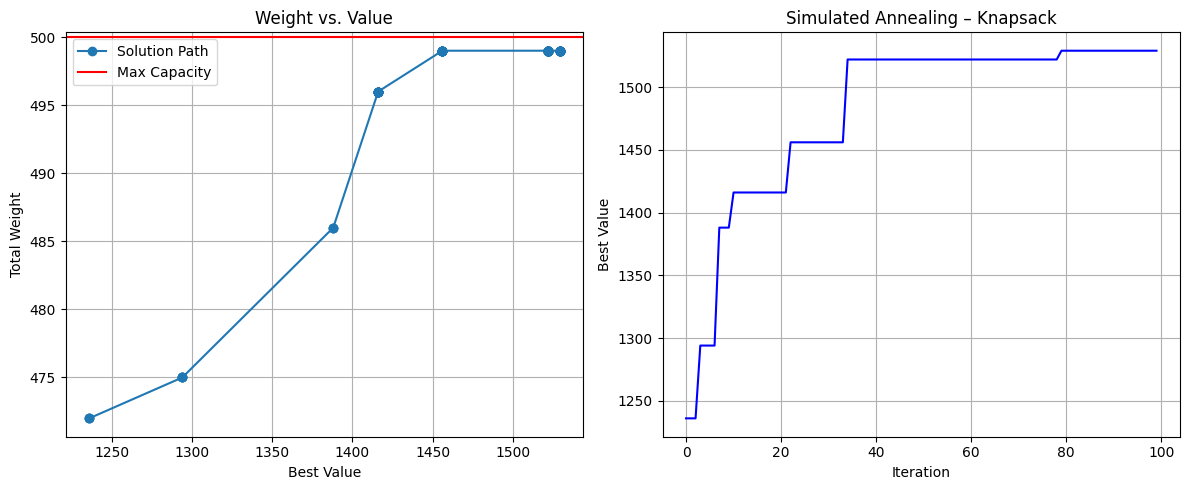

In [46]:
best_solution, best_values, best_weights = knapsack_simulated_annealing(starting_solution, values, weights, max_knapsack_capacity, max_iter, 10, 0.95)

import matplotlib.pyplot as plt

def plot_solution(max_iter, best_values, best_weights):
  iterations = list(range(max_iter))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

  ax1.plot(best_values, best_weights, marker='o', linestyle='-', label='Solution Path')
  ax1.axhline(y=max_knapsack_capacity, color='red', label='Max Capacity')
  ax1.set_xlabel("Best Value")
  ax1.set_ylabel("Total Weight")
  ax1.set_title("Weight vs. Value")
  ax1.legend()
  ax1.grid(True)

  ax2.plot(iterations, best_values, color='blue', label='Best Value Over Time')
  ax2.set_xlabel("Iteration")
  ax2.set_ylabel("Best Value")
  ax2.set_title("Simulated Annealing – Knapsack")
  ax2.grid(True)

  plt.tight_layout()
  plt.show()

plot_solution(max_iter, best_values, best_weights)

## Print the solution

In [47]:
print_solution(best_solution, values, weights)

Maximum value: 1529
Number of items selected: 29
Selected items: [35, 44, 58, 84, 87, 146, 208, 351, 382, 408, 420, 444, 547, 588, 653, 658, 661, 688, 718, 741, 770, 787, 806, 881, 894, 895, 966, 974, 980]
